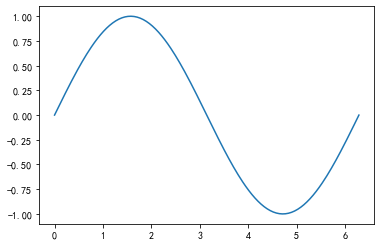

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x1 = np.linspace(0, 2 * np.pi, 200)
y1 = np.sin(x1)
plt.plot(x1, y1)
plt.show()

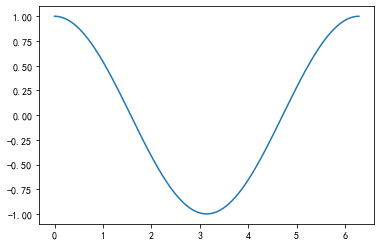

In [25]:
%matplotlib inline
x2 = np.linspace(0, 2 * np.pi, 200)
y2 = np.cos(x2)
plt.plot(x2, y2)

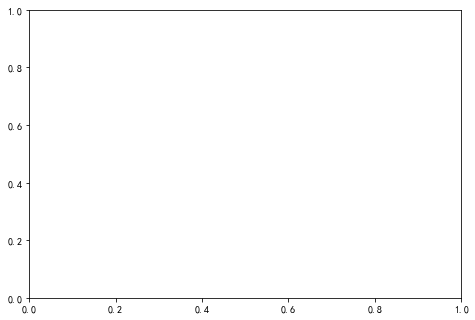

In [26]:
# 画出空图，设置左下宽高
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])

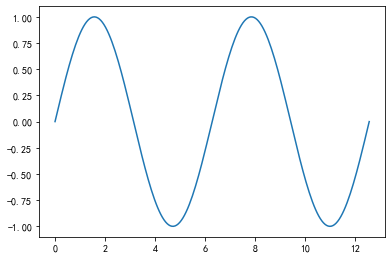

In [27]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
x = np.linspace(0, 4 * np.pi, 200)
ax.plot(x, np.sin(x))

In [28]:
fig.add_axes?

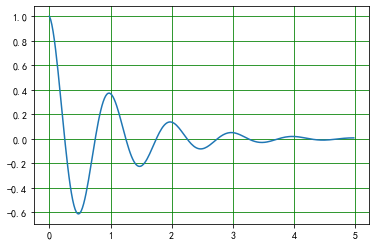

In [29]:
x = np.arange(0.0, 5.0, 0.02)
y = np.exp(-x) * np.cos(2 * np.pi * x)
plt.plot(x, y)
plt.grid(color='green')  # 显示网格

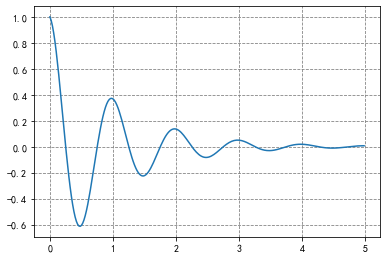

In [30]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(color='gray', linestyle='--')
ax.plot(x, y)

In [31]:
ax.grid?

(-1, 1.5)

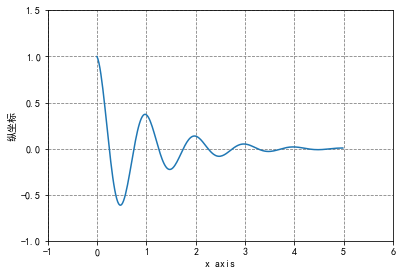

In [32]:
# 解决中文显示与负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(color='gray', linestyle='--')
ax.plot(x, y)

# 设置轴名称
ax.set_xlabel('x axis')
ax.set_ylabel('纵坐标')

# 设置轴取值范围
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 1.5)

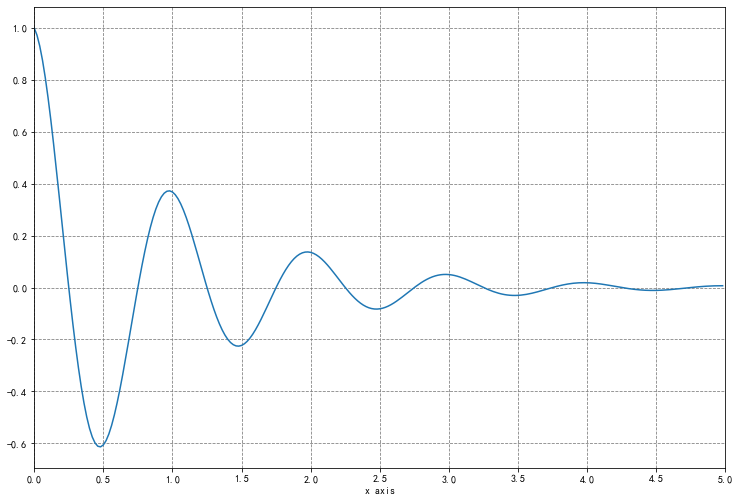

In [33]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.grid(color='gray', linestyle='--')
ax.plot(x, y)

ax.set_xlabel('x axis')
ax.set_xlim(0, 5)

# 设置轴刻度
ax.set_xticks(np.linspace(0, 5, 11))

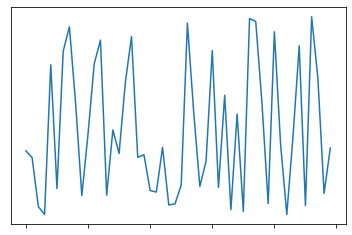

In [34]:
ax = plt.axes()
ax.plot(np.random.rand(50))

# 不显示Y轴刻线与标示
ax.yaxis.set_major_locator(plt.NullLocator())
# 不显示X轴标示
ax.xaxis.set_major_formatter(plt.NullFormatter())

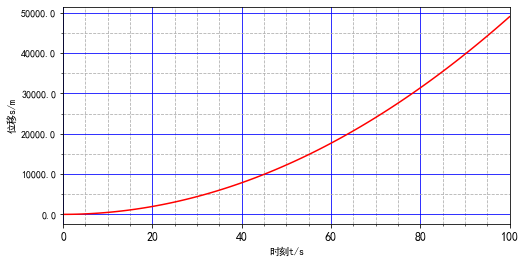

In [35]:
#综合练习
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

# 生成两个数组
t = np.linspace(0, 100, 100)
s = 9.8 * np.power(t, 2) / 2

# 绘制曲线
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, s, color='red')

ax.set_ylabel('位移s/m')
ax.set_xlim(0, 100)
ax.set_xlabel('时刻t/s')

# 以20的倍数为X轴的主刻线
xmajor_locator = MultipleLocator(20)
# 主标示显示格式
xmajor_formatter = FormatStrFormatter('%1d')
# 副刻线对象，5的倍数
xminor_locator = MultipleLocator(5)

# 弓10000的位数为Y轴的主刻线
ymajor_locator = MultipleLocator(10000)
ymajor_formatter = FormatStrFormatter('%1.1f')
yminor_locator = MultipleLocator(5000)

# 设置X轴
ax.xaxis.set_major_locator(xmajor_locator)
ax.xaxis.set_major_formatter(xmajor_formatter)
ax.xaxis.set_minor_locator(xminor_locator)

# 设置Y轴
ax.yaxis.set_major_locator(ymajor_locator)
ax.yaxis.set_major_formatter(ymajor_formatter)
ax.yaxis.set_minor_locator(yminor_locator)

# 设置网络
ax.grid(True, which='major', color='blue')
ax.grid(True, which='minor', linestyle='--')

# 循环设置X轴的刻度，字号为16
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(12)

In [37]:
# 比较plt.subplot和plt.subplots

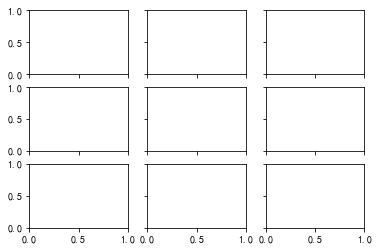

In [38]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row')

In [39]:
ax.shape

(3, 3)

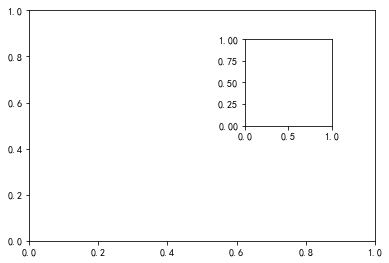

In [40]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([0.6, 0.5, 0.2, 0.3])

In [41]:
plt.subplot?

In [42]:
plt.subplots?

In [43]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [46]:
titanic.groupby(['sex', 'class'])['survived'].agg('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [49]:
# 按年龄分割样本
ages = pd.cut(titanic['age'], [0, 18, 60, 99])
ages

0      (18.0, 60.0]
1      (18.0, 60.0]
2      (18.0, 60.0]
3      (18.0, 60.0]
4      (18.0, 60.0]
           ...     
886    (18.0, 60.0]
887    (18.0, 60.0]
888             NaN
889    (18.0, 60.0]
890    (18.0, 60.0]
Name: age, Length: 891, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 60] < (60, 99]]

In [50]:
# 制作数据透视表
titanic.pivot_table('survived', index=['sex', ages], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 60]  0.972222  0.900000  0.413793
       (60, 99]  1.000000       NaN  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 60]  0.416667  0.061728  0.136364
       (60, 99]  0.083333  0.333333  0.000000